# M044_2024_12_04_09_30

Session: M044_2024_12_04_09_30

In [68]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../")

import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
import pyaldata as pyal

from tools.dsp.preprocessing import preprocess
import tools.viz.rasters as rt
from tools.params import Params



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# TODO: add example data to the repo and run on that
data_dir = r"C:\data\raw\M044\M044_2024_12_04_09_30"
fname = os.path.join(data_dir, "M044_2024_12_04_09_30_pyaldata.mat")

In [3]:
# load TrialData .mat file into a DataFrame
df = pyal.mat2dataframe(fname, shift_idx_fields=True)

field values_before_camera_trigger could not be converted to int.
field idx_before_camera_trigger could not be converted to int.
array field all_KSLabel could not be converted to int.


## Preprocessing from utils

In [ ]:
df_ = preprocess(df)

c:\Users\MartinEsparzaINBRAIN\AppData\Local\pypoetry\Cache\virtualenvs\earthquake-analysis-dAG31IpV-py3.12\Lib\site-packages\pyaldata\firing_rates.py:108: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn(


Combined every 3 bins
Resulting all_spikes ephys data shape is (NxT): (474, 133)


## Plotting

In [5]:
df_ = pyal.select_trials(df_, "idx_trial_end > 30365")  # Remove first 5 minutes because the switch was off

In [6]:
df_.head()

,animal,session,trial_id,trial_name,trial_length,bin_size,idx_trial_start,idx_trial_end,idx_CPI,values_before_camera_trigger,...,idx_Sol_duration,idx_sol_on,idx_earthquake_duration,idx_session_timer,all_chan_best,all_unit_guide,all_KSLabel,all_spikes,all_rates,sol_level_id
0,M044,M044_2024_12_04_09_30,82,trial,401,0.03,30233,30366,[],[],...,-1,66,[],[],"[0, 0, 0, 1, 1, 1, 2, 3, 3, 3, 3, 3, 5, 5, 5, ...","[[0, 1], [5, 1], [5, 3], [6, 2], [8, 2], [9, 1...","[good, mua, good, mua, good, good, good, good,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 2.798774, 0.0, 0.91412437, 0....",1
1,M044,M044_2024_12_04_09_30,84,trial,401,0.03,30399,30533,[],[],...,-1,66,[],[],"[0, 0, 0, 1, 1, 1, 2, 3, 3, 3, 3, 3, 5, 5, 5, ...","[[0, 1], [5, 1], [5, 3], [6, 2], [8, 2], [9, 1...","[good, mua, good, mua, good, good, good, good,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.003973114, 0.0, 0.0, 0.0, 0.91444397,...",1
2,M044,M044_2024_12_04_09_30,86,trial,401,0.03,30633,30766,[],[],...,-1,66,[],[],"[0, 0, 0, 1, 1, 1, 2, 3, 3, 3, 3, 3, 5, 5, 5, ...","[[0, 1], [5, 1], [5, 3], [6, 2], [8, 2], [9, 1...","[good, mua, good, mua, good, good, good, good,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[25.524176, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000319...",0
3,M044,M044_2024_12_04_09_30,88,trial,401,0.03,30933,31066,[],[],...,-1,66,[],[],"[0, 0, 0, 1, 1, 1, 2, 3, 3, 3, 3, 3, 5, 5, 5, ...","[[0, 1], [5, 1], [5, 3], [6, 2], [8, 2], [9, 1...","[good, mua, good, mua, good, good, good, good,...","[[1.4142135623730951, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[18.313324, 0.0, 0.0, 0.003973114, 0.0, 0.0, ...",1
4,M044,M044_2024_12_04_09_30,90,trial,401,0.03,31099,31233,[],[],...,-1,66,[],[],"[0, 0, 0, 1, 1, 1, 2, 3, 3, 3, 3, 3, 5, 5, 5, ...","[[0, 1], [5, 1], [5, 3], [6, 2], [8, 2], [9, 1...","[good, mua, good, mua, good, good, good, good,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.24716315, 0....",0


In [12]:
df_.values_Sol_direction == 1

0      False
1      False
2       True
3      False
4      False
       ...  
488    False
489    False
490    False
491     True
492    False
Name: values_Sol_direction, Length: 493, dtype: bool

- Trial 90 has some nice spikes

In [9]:

df_["M1_rates"] = [df_["all_rates"][i][:,300:] for i in range(len(df_))]
df_["Dls_rates"] = [df_["all_rates"][i][:,0:300] for i in range(len(df_))]

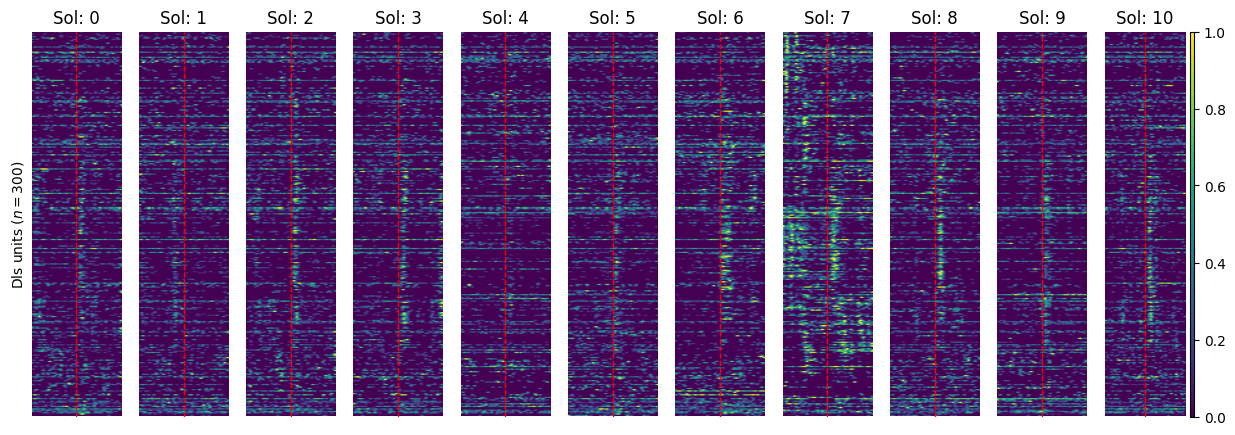

In [98]:
df__ = pyal.select_trials(df_, df.values_Sol_duration == 100)
for trial in range(10):
    fig, axes = plt.subplots(1, len(Params.sol_dir_to_level.keys()), figsize=(15, 5))
    axes = rt.plot_fr_raster(df__, axes, Params.sol_dir_to_level.keys(), trial=trial, area='Dls')
plt.show()
# 


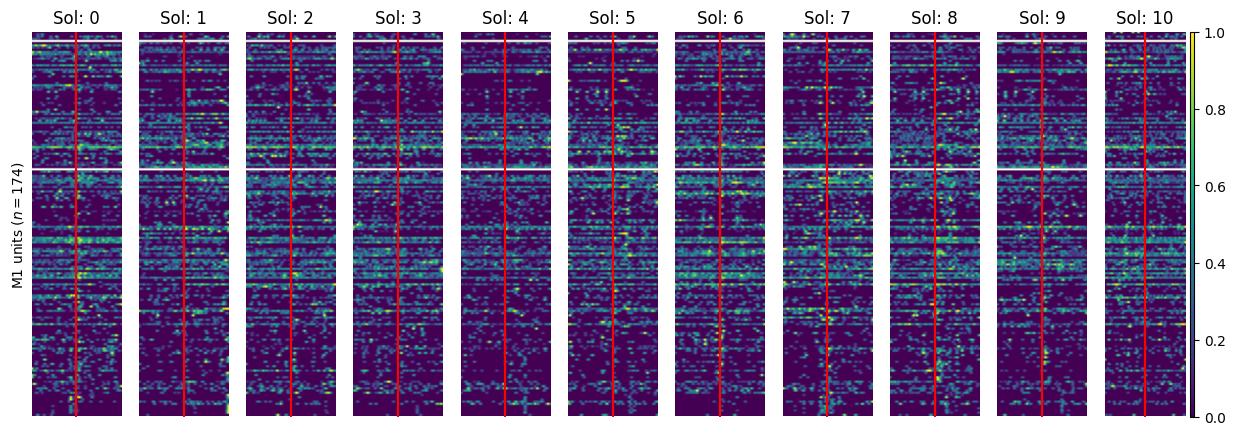

In [88]:
fig, axes = plt.subplots(1, len(Params.sol_dir_to_level.keys()), figsize=(15, 5))
axes = rt.plot_fr_raster(df_, axes, Params.sol_dir_to_level.keys(), trial=25, area='M1')
plt.show()
# 


In [93]:
df_.values_Sol_duration == 100

0      False
1      False
2       True
3      False
4      False
       ...  
488    False
489    False
490    False
491     True
492     True
Name: values_Sol_duration, Length: 493, dtype: bool